# kmeans

In [1]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score,\
    adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans

In [2]:
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

In [3]:
N = 400
centers = 4
data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)
data2, y2 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1,2.5,0.5,2), random_state=2)
data3 = np.vstack((data[y == 0][:], data[y == 1][:50], data[y == 2][:20], data[y == 3][:5]))
y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)
m = np.array(((1, 1), (1, 3)))
data_r = data.dot(m)

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
cm = matplotlib.colors.ListedColormap(list('rgbm'))
data_list = data, data, data_r, data_r, data2, data2, data3, data3
y_list = y, y, y, y, y2, y2, y3, y3
titles = '原始数据', 'KMeans++聚类', '旋转后数据', '旋转后KMeans++聚类',\
         '方差不相等数据', '方差不相等KMeans++聚类', '数量不相等数据', '数量不相等KMeans++聚类'


In [5]:
print(data_list[0])
print(data_list[0][0])
print(data_list[0][0][0])

[[ -1.97869191 -10.41036729]
 [ -5.98733291   1.09319552]
 [ -3.32042501  -9.43521984]
 [ -6.95990143   1.48643384]
 [ -0.51581431  -2.95589335]
 [ -6.98576681   2.3764377 ]
 [ -5.80752805  -0.01880673]
 [ -2.3875164   -3.79858985]
 [ -1.50834952 -11.55108763]
 [ -0.31932001  -8.72310502]
 [ -0.10604775  -1.97508279]
 [ -6.3698932    2.17096658]
 [  0.98564842  -2.22738281]
 [ -0.9889725   -3.47291703]
 [ -1.03011438  -1.02557957]
 [ -0.45064353  -8.8508534 ]
 [  0.72986148  -1.97091264]
 [ -0.24707289  -9.8104778 ]
 [ -3.30332765   3.32133548]
 [  1.02581503  -2.93411237]
 [ -0.77207963  -3.88246058]
 [  1.11435514  -2.1403809 ]
 [ -3.01806146  -8.44065141]
 [  2.07905596  -0.39137275]
 [ -1.3132102   -5.21553485]
 [  2.37703059  -1.1452029 ]
 [ -3.71486953  -9.36874886]
 [ -0.44554402  -3.2977466 ]
 [ -1.07589398  -8.07477912]
 [ -7.2774513    3.49894912]
 [ -1.29923245  -8.30647414]
 [ -1.39638106  -4.26919995]
 [ -2.23638886  -5.40208811]
 [ -2.50153112  -7.67699872]
 [ -0.72081785

In [6]:
y_list

(array([0, 3, 0, 3, 2, 3, 3, 2, 0, 0, 1, 3, 1, 2, 1, 0, 1, 0, 3, 1, 2, 1,
        0, 1, 2, 1, 0, 2, 0, 3, 0, 2, 2, 0, 1, 3, 0, 3, 0, 1, 1, 3, 0, 2,
        1, 0, 3, 1, 1, 3, 2, 0, 0, 3, 1, 0, 1, 3, 3, 1, 2, 1, 1, 2, 1, 2,
        1, 2, 1, 2, 2, 1, 3, 2, 3, 2, 2, 1, 0, 2, 3, 3, 3, 1, 1, 2, 0, 3,
        3, 2, 1, 2, 0, 0, 2, 1, 1, 2, 3, 1, 1, 2, 2, 0, 1, 3, 3, 2, 3, 1,
        3, 3, 1, 2, 1, 1, 1, 2, 0, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0,
        2, 0, 1, 0, 1, 0, 3, 1, 2, 3, 2, 0, 0, 3, 1, 0, 0, 0, 0, 2, 0, 1,
        3, 2, 2, 3, 1, 2, 0, 0, 0, 2, 2, 0, 3, 1, 0, 0, 3, 1, 1, 0, 0, 3,
        2, 3, 1, 1, 2, 3, 3, 1, 1, 0, 0, 1, 0, 1, 3, 2, 3, 0, 3, 2, 2, 3,
        0, 1, 1, 2, 0, 3, 1, 3, 0, 3, 1, 1, 3, 3, 0, 3, 2, 1, 2, 3, 0, 2,
        0, 3, 3, 2, 0, 2, 3, 3, 1, 2, 0, 1, 3, 2, 3, 3, 0, 0, 1, 0, 1, 0,
        2, 3, 2, 0, 0, 0, 1, 1, 2, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 2, 3,
        2, 2, 0, 0, 2, 3, 3, 3, 3, 1, 3, 0, 3, 2, 0, 0, 2, 3, 3, 1, 3, 3,
        1, 3, 2, 1, 1, 2, 2, 3, 0, 2, 

1
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.616436816839852 

2
Homogeneity： 0.9898828240244267
completeness： 0.9899006758819153
V measure： 0.9898917498726852
AMI： 0.9897991568445268
ARI： 0.9933165272203728
Silhouette： 0.6189656317733315 

3
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.5275987244664399 

4
Homogeneity： 0.7265509613434447
completeness： 0.7275335533208979
V measure： 0.7270419253408102
AMI： 0.7242894892118522
ARI： 0.6732267498459052
Silhouette： 0.5349798539919979 

5
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.4790725752982868 



/Users/luocheng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the b

6
Homogeneity： 0.7449364376693913
completeness： 0.7755445167472191
V measure： 0.7599323988656883
AMI： 0.7428234768685047
ARI： 0.7113213508090338
Silhouette： 0.5737260449304202 

7
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.5975066093204152 

8
Homogeneity： 0.9776347312784609
completeness： 0.9728632742060752
V measure： 0.975243166591057
AMI： 0.9721283376882836
ARI： 0.9906840043816505
Silhouette： 0.6013877858619149 



/Users/luocheng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans

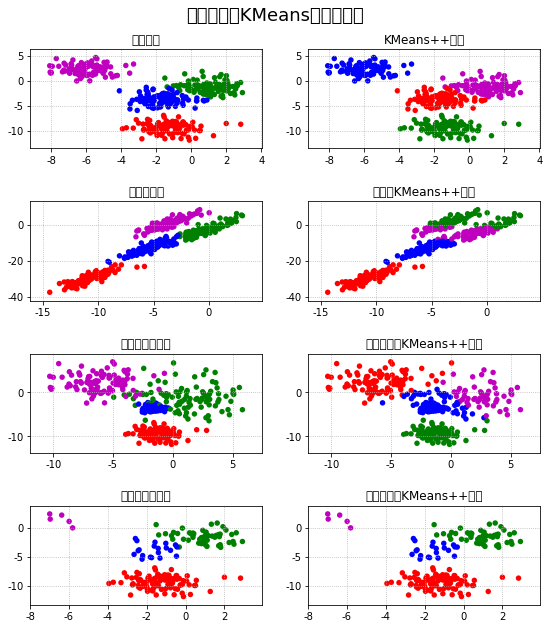

In [7]:
model = KMeans(n_clusters=4, init='k-means++', n_init=5)
plt.figure(figsize=(8, 9), facecolor='w')
for i, (x, y, title) in enumerate(zip(data_list, y_list, titles), start=1):
    plt.subplot(4, 2, i)
    plt.title(title)
    if i % 2 == 1:
        y_pred = y
    else:
        y_pred = model.fit_predict(x)
    print(i)
    print('Homogeneity：', homogeneity_score(y, y_pred))
    print('completeness：', completeness_score(y, y_pred))
    print('V measure：', v_measure_score(y, y_pred))
    print('AMI：', adjusted_mutual_info_score(y, y_pred))
    print('ARI：', adjusted_rand_score(y, y_pred))
    print('Silhouette：', silhouette_score(x, y_pred), '\n')
    plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=30, cmap=cm, edgecolors='none')
    x1_min, x2_min = np.min(x, axis=0)
    x1_max, x2_max = np.max(x, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(b=True, ls=':')
plt.tight_layout(2, rect=(0, 0, 1, 0.97))
plt.suptitle('数据分布对KMeans聚类的影响', fontsize=18)
plt.show()

In [9]:
from sklearn.externals import joblib
joblib.dump(model, "kmeans_model.m")
km_cluster = joblib.load("kmeans_model.m")
km_cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
      dtype=int32)

# DBSCAN

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

In [11]:
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
data = StandardScaler().fit_transform(data)
# 数据1的参数：(epsilon, min_sample)
params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))

# 数据2
# t = np.arange(0, 2*np.pi, 0.1)
# data1 = np.vstack((np.cos(t), np.sin(t))).T
# data2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
# data3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
# data = np.vstack((data1, data2, data3))
# # # 数据2的参数：(epsilon, min_sample)
# params = ((0.5, 3), (0.5, 5), (0.5, 10), (1., 3), (1., 10), (1., 20))

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False


data

array([[ 0.41989283,  0.74498461],
       [ 1.65655531,  1.39504751],
       [-1.09581059,  0.97234032],
       ...,
       [ 1.25464032, -1.41480963],
       [ 1.88527283, -0.70184446],
       [ 0.28235426, -0.21761325]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[-1  0  1  2  3] 聚类簇的个数为： 4
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.95686275 0.42745098 0.2627451  1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.90196078 0.96078431 0.59607843 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0  1  2  3] 聚类簇的个数为： 4
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.95686275 0.42745098 0.2627451  1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.90196078 0.96078431 0.59607843 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0  1  2  3  4] 聚类簇的个数为： 5
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.90442138 0.3479431  0.28304498 1.        ]
 [0.9928489  0.71695502 0.4094579  1.        ]
 [0.99915417 0.97377932 0.70503652 1.        ]
 [0.81122645 0.92387543 0.61453287 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0] 聚类簇的个数为： 1
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[-1  0  1] 聚类簇的个数为： 2
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0  1  2  3] 聚类簇的个数为： 4
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.95686275 0.42745098 0.2627451  1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.90196078 0.96078431 0.59607843 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]


/Users/luocheng/anaconda3/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
  MathTextWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u805a' [U+805a], substituting with a dummy symbol.
  MathTextWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u7c7b' [U+7c7b], substituting with a dummy symbol.
  MathTextWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u6570' [U+6570], substituting with a dummy symbol.
  MathTextWarning)
/Users/luocheng/anaconda3/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\u76ee' [U+

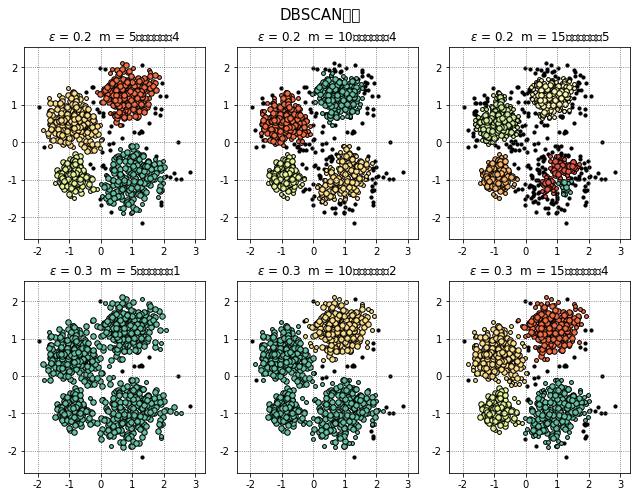

In [12]:
plt.figure(figsize=(9, 7), facecolor='w')
plt.suptitle('DBSCAN聚类', fontsize=15)

for i in range(6):
    eps, min_samples = params[i]
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data)
    y_hat = model.labels_

    core_indices = np.zeros_like(y_hat, dtype=bool)
    core_indices[model.core_sample_indices_] = True

    y_unique = np.unique(y_hat)
    n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
    print(y_unique, '聚类簇的个数为：', n_clusters)

    # clrs = []
    # for c in np.linspace(16711680, 255, y_unique.size):
    #     clrs.append('#%06x' % c)
    plt.subplot(2, 3, i+1)
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
    print(clrs)
    for k, clr in zip(y_unique, clrs):
        cur = (y_hat == k)
        if k == -1:
            plt.scatter(data[cur, 0], data[cur, 1], s=10, c='k')
            continue
        plt.scatter(data[cur, 0], data[cur, 1], s=15, c=clr, edgecolors='k')
        plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=30, c=clr, marker='o', edgecolors='k')
    x1_min, x2_min = np.min(data, axis=0)
    x1_max, x2_max = np.max(data, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.plot()
    plt.grid(b=True, ls=':', color='#606060')
    plt.title(r'$\epsilon$ = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()